In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Feedback de tus modelos

<div class="alert alert-success">
  Ciertos modelos como la regresión o los arboles se dicen **"interpretables"**. Esto quiere decir que de los resultados de los modelos podemos sacar conclusiones o **"insights"**.
</div>

En particular la regresión Lasso es interpretable: 

- mientras más grande el coeficiente para una feature, más relevante es esta para la regresión.
- la regresión Lasso trata de seleccionar un pequeño número de features relevantes.

In [3]:
X = pd.read_csv('../vol/intermediate_results/X.csv')

y = X['worldwide_gross']
X = X.drop('worldwide_gross',axis=1)

In [4]:
from sklearn.linear_model import Lasso

model = Lasso()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [7]:
len(X_train)/len(X)

0.75

In [8]:
model.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [9]:
model.score(X_test,y_test)

0.53670649813230509

In [12]:
model.coef_

array([  2.89526507e+00,  -1.40301472e+00,   1.66308214e-02,
         3.33819964e+00,   2.15878265e+02,  -8.00752044e-03,
         2.53750354e+07])

In [15]:
var = np.floor(np.log10(np.abs(model.coef_)))

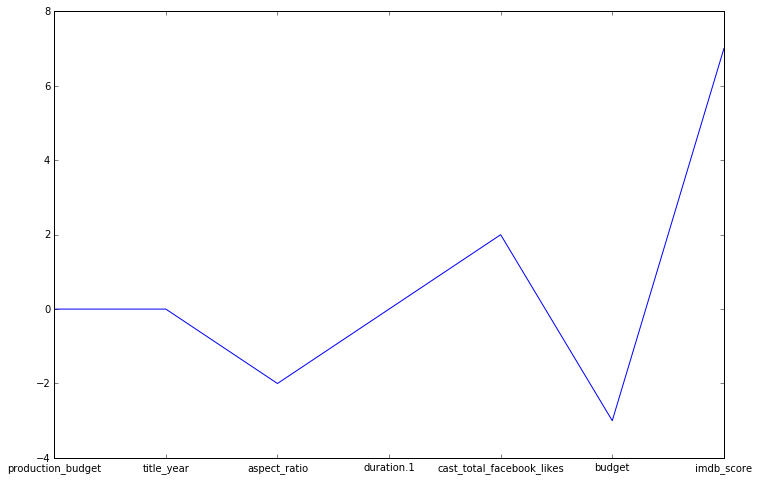

In [17]:
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(var)
plt.xticks(np.arange(7),list(X.columns));

Esto nos guía a guardar únicamente:

- production_budget
- title_year
- duration
- cast_total_facebook_likes
- imdb_score

## Correlación entre variables

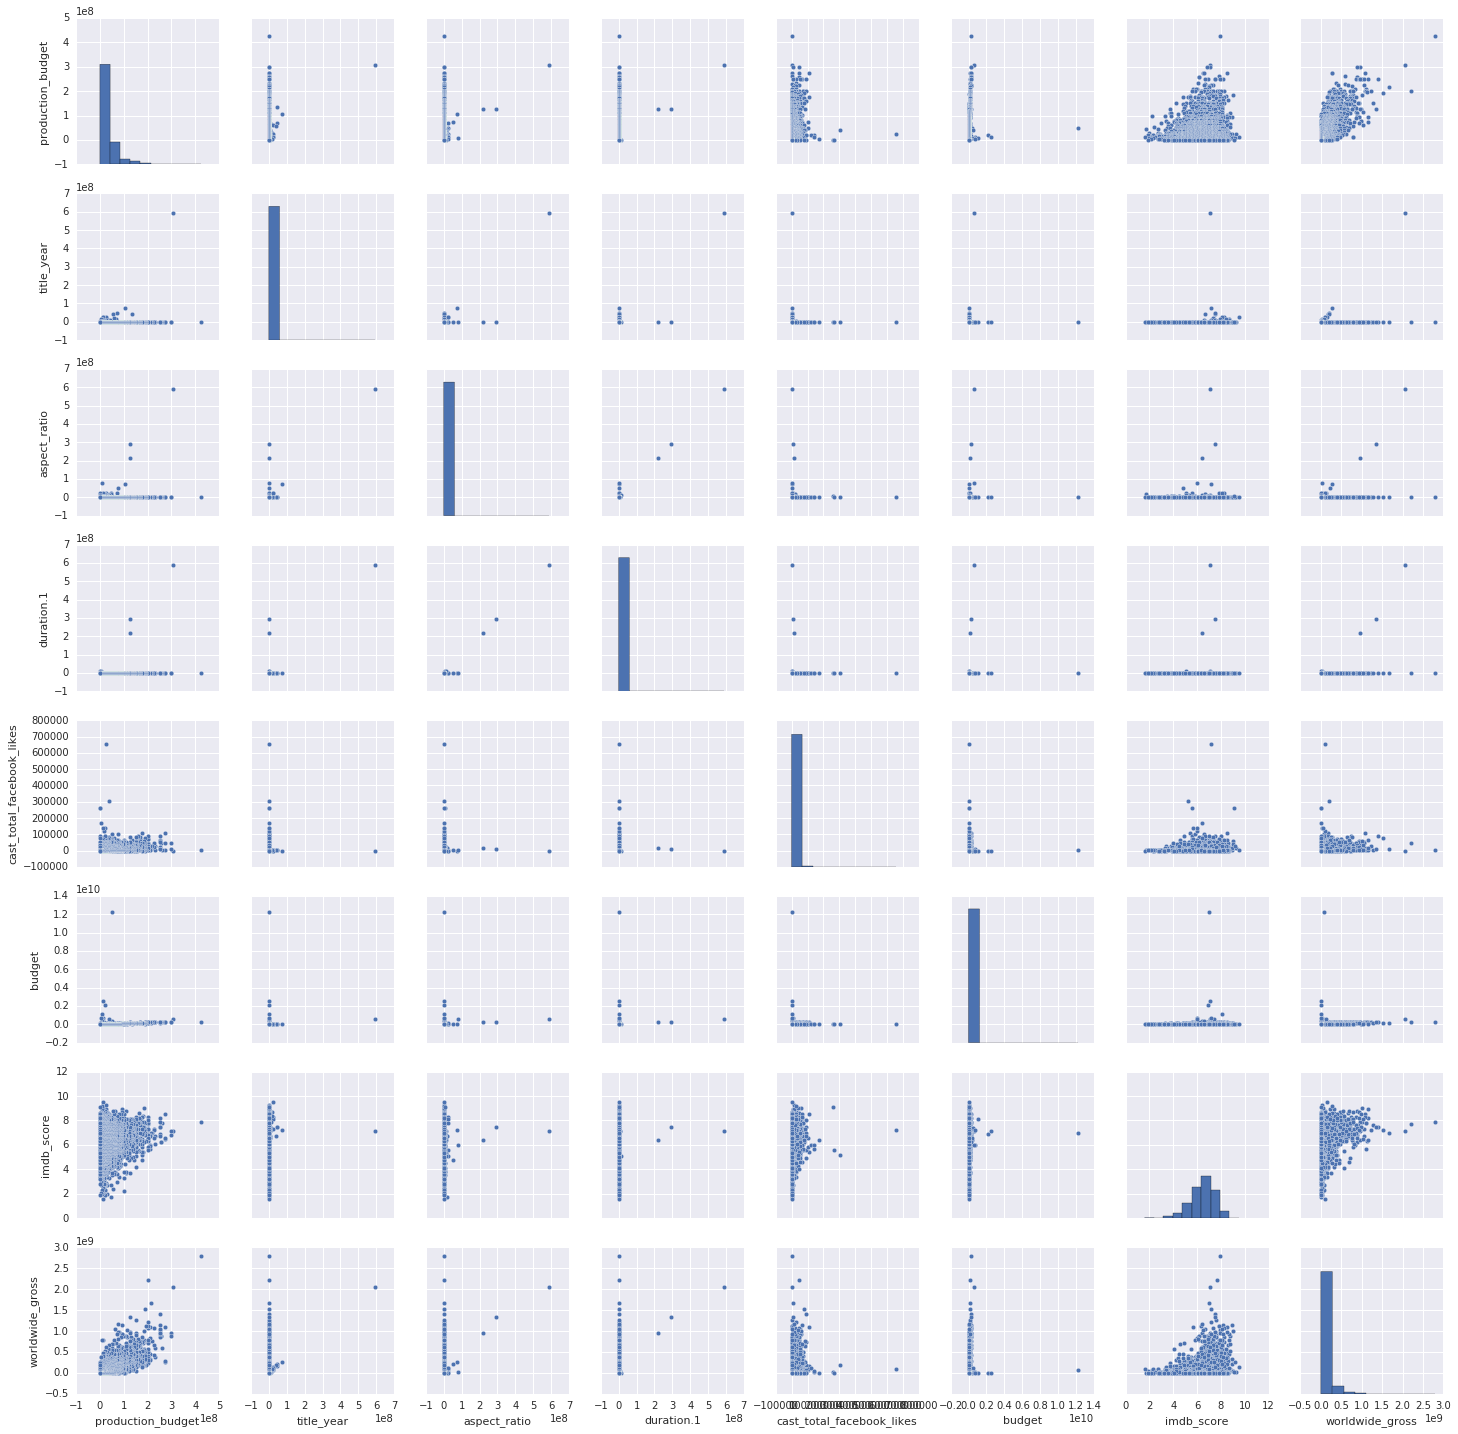

In [18]:
import seaborn as sns

Z = pd.concat([X,y],axis=1)
sns.pairplot(Z)

In [28]:
clase = pd.cut(X['production_budget'],8).cat.codes.rename('class')
Z2 = pd.concat([X,clase],axis=1)

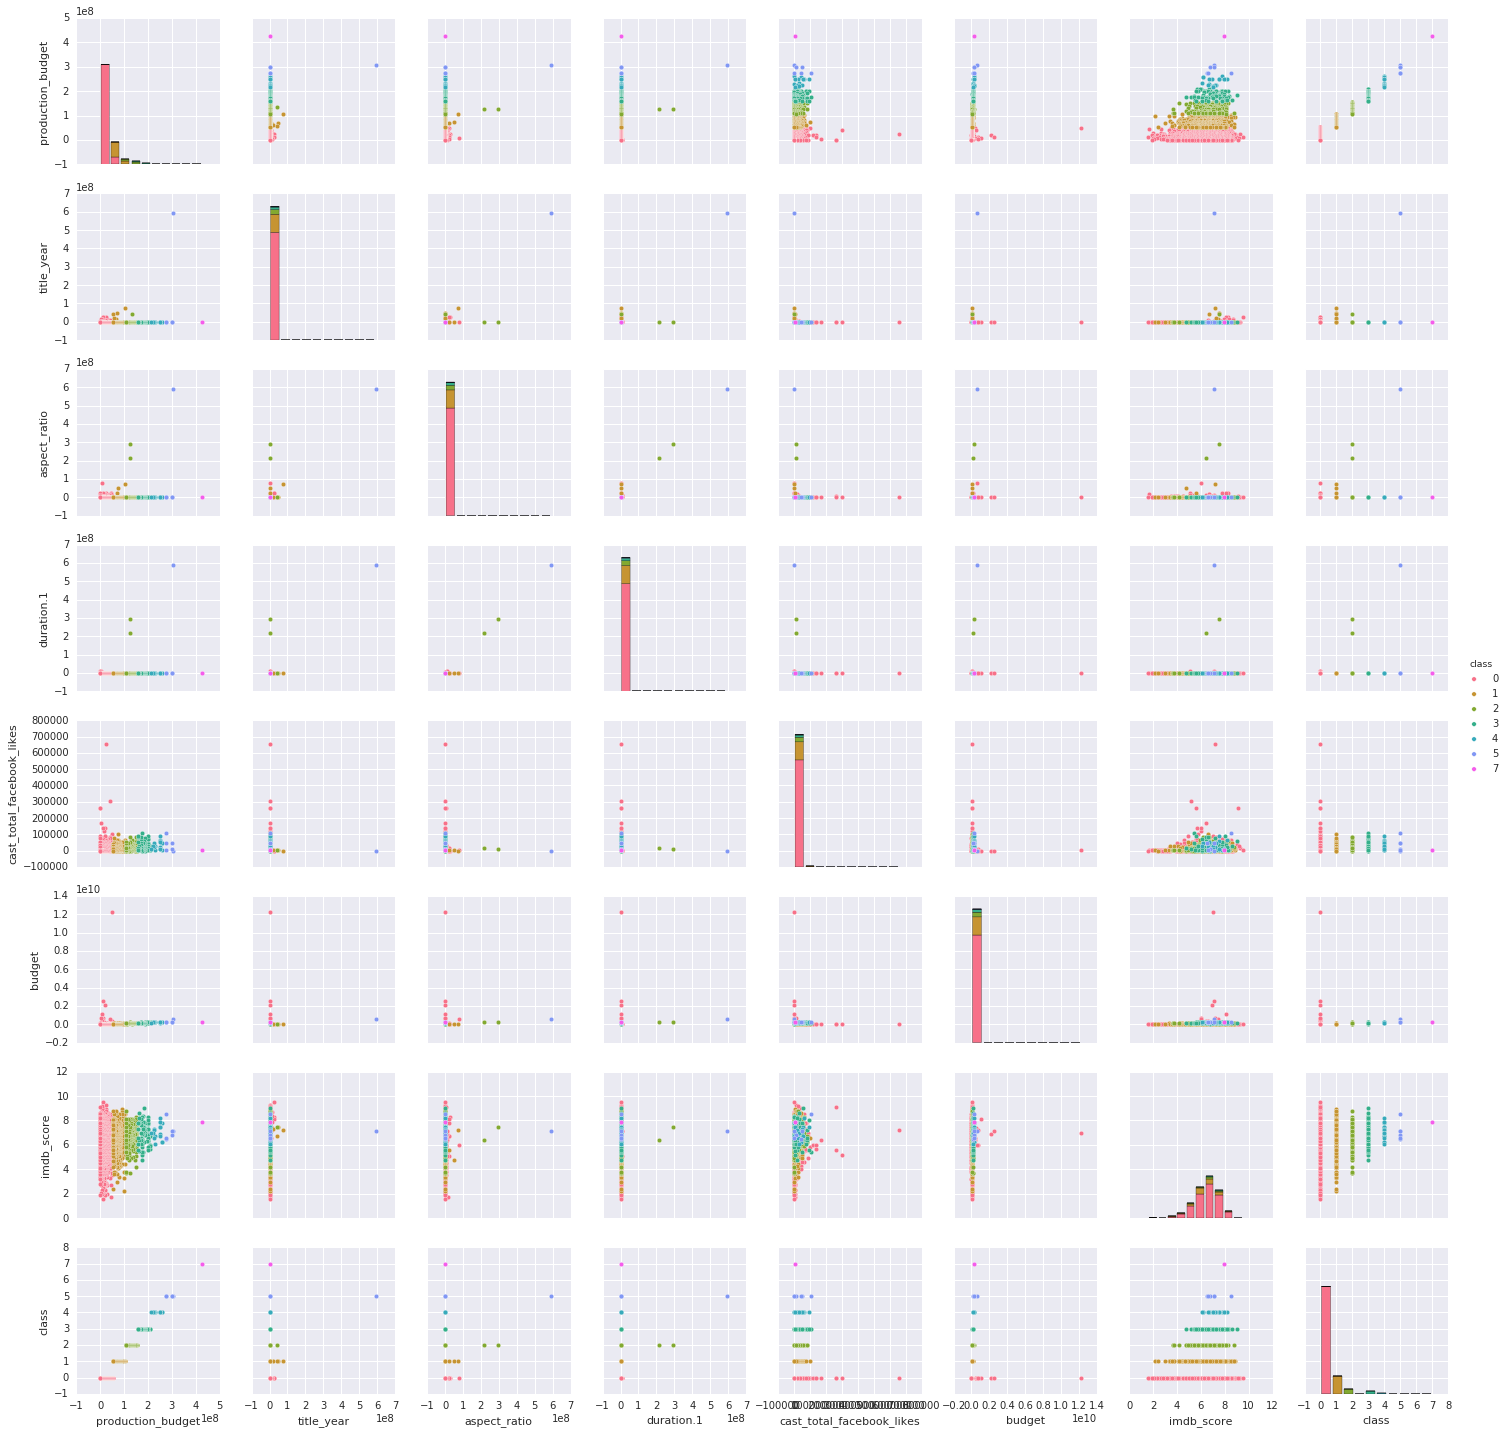

In [29]:
sns.pairplot(Z2,hue='class')

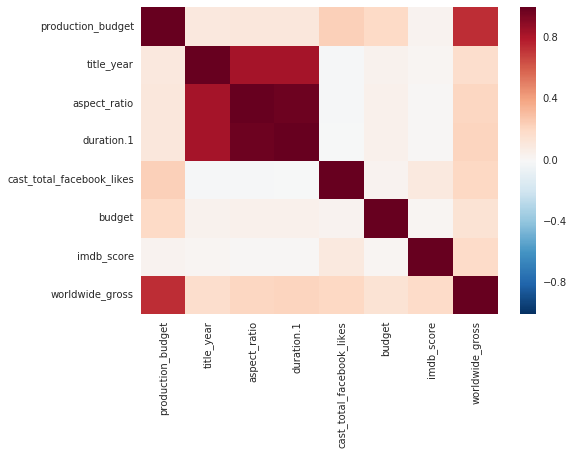

In [31]:
Z3 = pd.concat([X,y],axis=1)
sns.heatmap(Z3.corr())

De esto concluimos, sin sorpresa, que son muy importantes:

- production_budget
- imdb_score

## Metodos de selección automatica de features

<div class="alert alert-info">
  Sklearn posee una serie de métodos para seleccionar las mejores features. Estos métodos los puedes encontrar en sklearn.feature_selection
</div>

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

selector = SelectKBest(mutual_info_regression, k=4)
selector.fit(X,y)

SelectKBest(k=4,
      score_func=<function mutual_info_regression at 0x7faf38ed7730>)

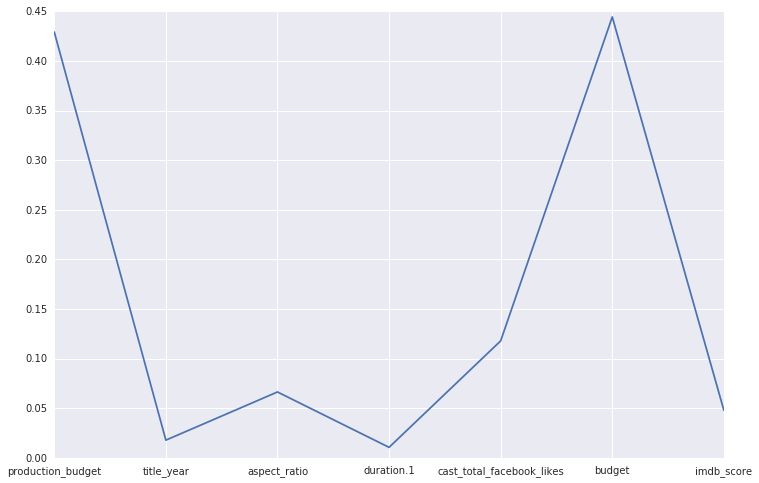

In [34]:
scores = selector.scores_
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(scores)
plt.xticks(np.arange(7),list(X.columns));

Del analisis univariante obtenemos que las mejores features son:

- production_budget
- cast_total_facebook_likes
- budget

**Guardaremos las 5 features entregadas por la interpretación de nuestra regresión Lasso**

In [35]:
X2 = X[['production_budget','title_year','duration.1','cast_total_facebook_likes','imdb_score']]
X3 = X[['production_budget','cast_total_facebook_likes','imdb_score']]

## Veamos los resultados del modelo con estas features

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [37]:
cols2 = ['production_budget','title_year','duration.1','cast_total_facebook_likes','imdb_score']
X2_train, X2_test, y2_train, y2_test = X_train[cols2], X_test[cols2], y_train, y_test

cols3 = ['production_budget','cast_total_facebook_likes','imdb_score']
X3_train, X3_test, y3_train, y3_test = X_train[cols3], X_test[cols3], y_train, y_test

In [40]:
from sklearn.linear_model import Lasso

model1 = Lasso()
model2 = Lasso()
model3 = Lasso()

model1.fit(X_train,y_train)
model2.fit(X2_train,y2_train)
model3.fit(X3_train,y3_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [41]:
print(model1.score(X_test,y_test))
print(model2.score(X2_test,y2_test))
print(model3.score(X3_test,y3_test))

0.588827166128
0.5887559341
0.564313646779
